## Title: Data Analysis and Storytelling Notebook Setup  .ipynb File  
## Author: Anuradha Tarafder  
## Date: 30th November 2024  

## Introduction

This project aims to explore the Telco Customer Churn dataset to identify patterns and factors contributing to customer churn. By analyzing various aspects of customer behavior, demographics, and service usage, it is hoped to provide insights that can guide the company’s strategies for improving customer retention. This analysis will address five research questions related to contract types, charges, service adoption, billing preferences, and demographics, each of which contributes a unique perspective on factors affecting retention.

## Dataset Description

The **Telco Customer Churn** dataset consists of data about telecommunications customers, including information on demographics, service usage, and whether the customer has churned (i.e., left the company). Each row represents a unique customer record, totaling **7,043 rows** and **21 columns**.

**The Key variables include:**

>- CustomerID 
>- Contract 
>- Churn 
>- Tenure
>- MonthlyCharges
>- PaymentMethod
>- InternetService
>- Additional service
>- SeniorCitizen
>- Dependents
>- Gender

The unit of observation in this dataset is an individual customer. Each row represents one unique customer and their associated attributes, capturing data on demographics, account details, service usage, and churn status.Also, the dataset is valuable for understanding customer retention drivers, which are crucial for developing strategies to enhance customer loyalty.

In [11]:
## Loading required packages
import pandas as pd
import matplotlib.pyplot as plt

## Loading the dataset
telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

##  Displays a concise summary of the telco DataFrame, 
##  including the index, column names, non-null counts, 
##  and data types for each column
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
## Displays the first few rows of the dataset 
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Research Questions 

### Question 1:
**What is the relationship between contract type and customer churn, and how does it vary with tenure?**

### Value of the Question:
Examining the relationship between contract type and churn helps identify whether certain contract types retain customers better, especially over longer tenures. This insight could guide the company in designing contract terms that promote customer loyalty.

### Variables involved:
>- Contract (Month-to-month, One year, Two year)
>- Churn (Yes/No)
>- Tenure (in months)

### Planned Analysis:
1. Data Segmentation:
   >- Data will be segmented by contract type to analyze each group (Month-to-month, One year, Two year) separately.
   >- Each contract type will be grouped by tenure ranges (e.g., 0-12 months, 13-24 months).
2. Calculate Churn Rates:
   >- For each contract type and tenure range, will calculate the proportion of customers who have churned.
   >- This will be done by dividing the number of churned customers by the total number of customers in each group.
3. Visualizations:
   >- Will create line or bar chart showing churn rates for each contract type across different tenure ranges.
   >- Interpretation: By observing the charts, can interpret how churn rates vary with tenure for each contract type. This will eventually help to understand if longer tenures are associated with lower churn for specific contract types and provide insights into which contracts are more likely to retain customers over time.


Churn                           No   Yes
Contract       TenureCategory           
Month-to-month 0-12            970  1024
               13-24           459   278
               25-36           328   158
               37-48           210   106
               49-60           169    65
               61-72            84    24
One year       0-12            110    13
               13-24           181    16
               25-36           230    20
               37-48           233    35
               49-60           277    44
               61-72           275    38
Two year       0-12             58     0
               13-24            90     0
               25-36            94     2
               37-48           174     4
               49-60           266    11
               61-72           955    31


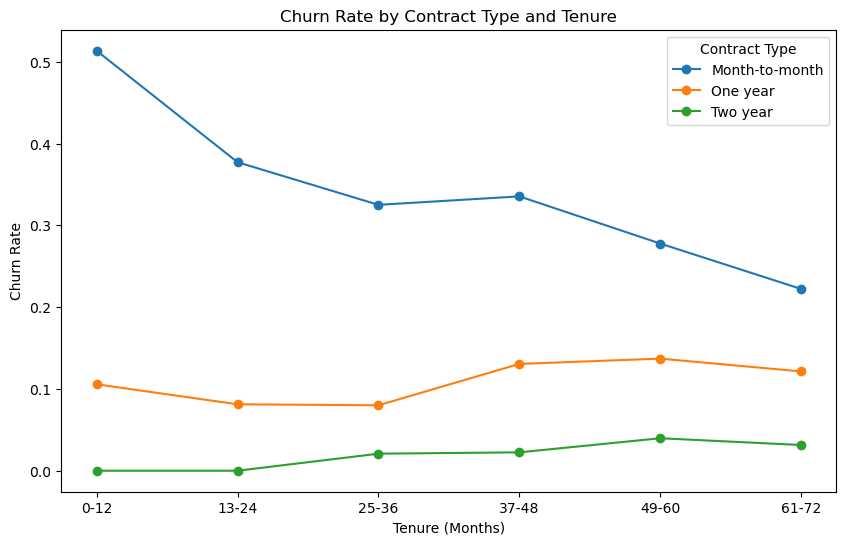

In [13]:
## Segmenting data by contract type and churn status
contract_churn = telco.groupby(['Contract', 'Churn'])['customerID'].count().unstack()

## Calculating churn rates across tenure ranges
telco['TenureCategory'] = pd.cut(telco['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
contract_tenure_churn = telco.groupby(['Contract', 'TenureCategory', 'Churn'], observed=False).size().unstack().fillna(0)
print(contract_tenure_churn)
## The churn rates will be in separate columns, so calculating it properly by accessing these columns by their names
## 'Churn' is correctly handled in the unstacked result
contract_tenure_churn['ChurnRate'] = contract_tenure_churn['Yes'] / (contract_tenure_churn['Yes'] + contract_tenure_churn['No'])


## Visualizing churn rates by contract type and tenure using matplotlib
plt.figure(figsize=(10, 6))

## Looping through each unique contract type to plot churn rate for each contract type
for contract in contract_tenure_churn.index.get_level_values('Contract').unique():
    ## Filtering the data for the current contract type
    contract_data = contract_tenure_churn.xs(contract, level='Contract')
    
    ## Plotting the churn rate for the current contract type
    plt.plot(contract_data.index, contract_data['ChurnRate'], label=contract, marker='o')

## Adding labels and title
plt.title('Churn Rate by Contract Type and Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')

## Showing legend
plt.legend(title='Contract Type')

## Showing the plot
plt.show()


## Interpretation-

**High churn in the first year:** Customers with month-to-month contracts have the highest churn rate, especially in the 0-12 months category, indicating that flexibility in contract duration may not always be favorable for customer retention.

**Retention increases with contract duration:** The churn rate decreases significantly for customers on one-year or two-year contracts, suggesting that longer commitments help retain customers.

## Recommendations- 
To reduce churn, especially among month-to-month customers, the company could consider offering incentives to encourage longer contract durations or find ways to enhance customer satisfaction early in the contract term.

### Question 2:
**Is there a relationship between the type of internet service and the adoption of additional services (like OnlineSecurity, StreamingTV, or StreamingMovies), and how do these relate to churn?**

### Value of the Question:
This question explores whether certain types of internet services lead to greater adoption of additional services, potentially impacting churn. Insights from this could support bundling strategies to enhance customer retention.

### Variables involved:
>- InternetService (DSL/Fiber optic/No)
>- OnlineSecurity (Yes/No/No internet service)
>- StreamingTV (Yes/No/No internet service)
>- StreamingMovies (Yes/No/No internet service)
>- Churn (Yes/No)

### Planned Analysis:
1. Segment by Internet Service:
   >- The data is segmented by type of internet service (DSL, Fiber optic, No service).
   
2. Adoption Rates for Additional Services:
   >- For each internet service type, the adoption rate will be calculated for each additional service (OnlineSecurity, StreamingTV, StreamingMovies).
   >- Churn rates will be calculated within each group, segmented by adoption of additional services.  
**Adoption rate refers to the percentage of customers within each internet service type (DSL, Fiber optic, No internet service) who have opted for a particular additional service (e.g., OnlineSecurity, StreamingTV, or StreamingMovies).**
   
3. Visualizations:
   >- Will create stacked bar charts to show the proportion of churned vs. retained customers who have each additional service, segmented by internet service type.
   >- Interpretation: These visualizations will help interpret whether certain internet services and additional service combinations are associated with lower churn. If, for example, fiber-optic users with multiple additional services churn less, this insight could suggest focusing on bundled offers for this customer group.

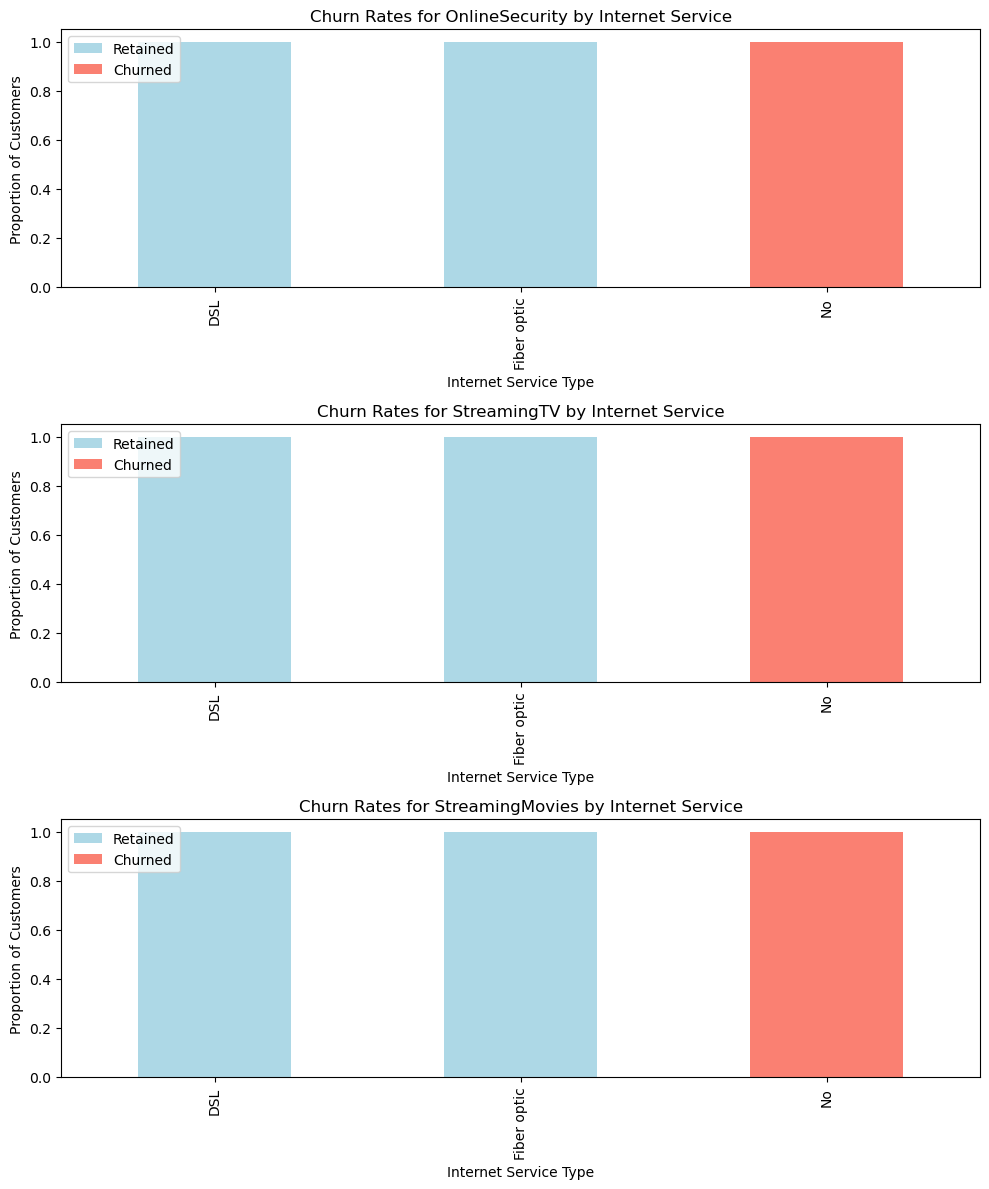

In [14]:
## Segmenting by Internet Service
## Grouping by 'InternetService' and calculating the churn rate for each additional service
internet_service_groups = telco.groupby('InternetService')

## Adoption Rates for Additional Services (OnlineSecurity, StreamingTV, StreamingMovies)
## Calculating the churn rates for each of the additional services within each type of Internet Service
services = ['OnlineSecurity', 'StreamingTV', 'StreamingMovies']

## Creating a dictionary to store the churn rates for each service type and internet service type
churn_rates = {}

for service in services:
    churn_rates[service] = internet_service_groups[service].value_counts(normalize=True).unstack().fillna(0)

## Visualizing the churn rates using stacked bar charts
fig, axes = plt.subplots(len(services), 1, figsize=(10, 12))

for i, service in enumerate(services):
    ## Plotting the churn rates for each service and internet service type
    churn_rates[service].plot(kind='bar', stacked=True, ax=axes[i], color=['lightblue', 'salmon'], legend=False)
    axes[i].set_title(f'Churn Rates for {service} by Internet Service')
    axes[i].set_xlabel('Internet Service Type')
    axes[i].set_ylabel('Proportion of Customers')
    axes[i].legend(['Retained', 'Churned'], loc='upper left')

## Showing the plot
plt.tight_layout()
plt.show()

## Interpretation -

**Low Churn for DSL and Fiber Optic Users:** For customers with DSL or Fiber optic internet, the adoption of OnlineSecurity, StreamingTV, and StreamingMovies seems to be correlated with lower churn rates. This indicates that providing these additional services to customers with internet connections could be an effective retention strategy.

**High Churn for No Internet Service:** Customers without any internet service who adopt any of these additional services are more likely to churn. This highlights the importance of offering internet services and bundling them with additional services to improve customer retention.

## Retention Strategy Suggestion -
The company could consider bundling OnlineSecurity, StreamingTV, and StreamingMovies with DSL and Fiber optic plans to boost customer retention. However, for customers with No Internet Service, focusing on service offerings that cater to their specific needs may be more effective to reduce churn.

This interpretation suggests that additional services can help reduce churn for customers who already have internet services, but may not be as effective for customers who do not have internet access. This could inform marketing strategies and service bundling decisions.

### Question 3:
**How does the presence of dependents and tenure length influence customer churn, and does this relationship differ by gender?**

### Value of the Question:
This question investigates if customers with dependents tend to stay longer and if gender influences this trend. Insights could suggest personalized marketing strategies based on family status and gender.

### Variables involved:
>- Dependents (Yes/No)
>- Tenure (in months)
>- Churn (Yes/No)
>- Gender (Male/Female)

### Planned Analysis:
1. Data Segmentation:
   >- The data will be divided by dependent status (Yes/No) and gender (Male/Female).
   
2. Calculate Churn Rates Across Tenure:
   >- For each combination of dependent status and gender, churn rates across different tenure ranges (e.g., 0-12 months, 13-24 months) will be calculated.
   
3. Visualizations:
   >- Will create line or bar plots to illustrate how churn rates vary over tenure for each group (dependent status and gender).
   >- Interpretation: These visualizations will help interpret if customers with dependents, especially of a particular gender, have lower churn rates over time. If the analysis reveals that women with dependents and longer tenures churn less, this insight could inform targeted retention strategies focused on family-oriented messaging.

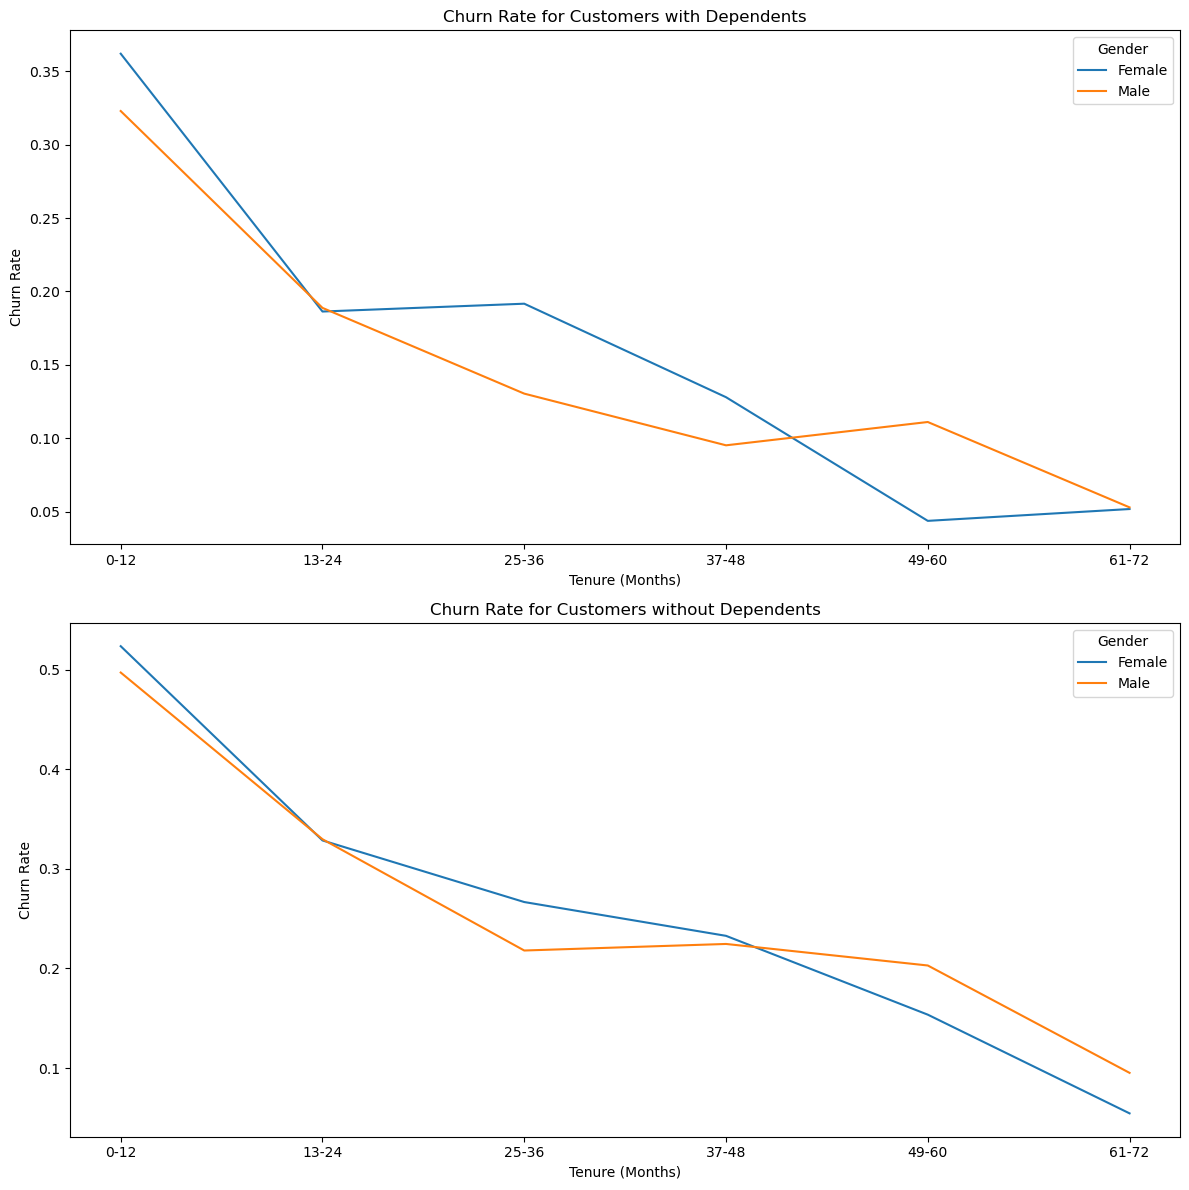

In [15]:
## Segmenting data by Dependents and Gender
telco['TenureCategory'] = pd.cut(telco['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])

## Calculating churn rates for each combination of Dependents, Gender, and TenureCategory
churn_rates = telco.groupby(['Dependents', 'gender', 'TenureCategory', 'Churn'] , observed=False).size().unstack().fillna(0)
churn_rates['ChurnRate'] = churn_rates['Yes'] / (churn_rates['Yes'] + churn_rates['No'])

## Creating line plots to show how churn rates vary over tenure for each group (Dependents and Gender)
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

## Plotting churn rates for customers with Dependents
for gender in telco['gender'].unique():
    dependent_data = churn_rates.xs(('Yes', gender), level=('Dependents', 'gender'))
    axes[0].plot(dependent_data.index, dependent_data['ChurnRate'], label=f'{gender}')

axes[0].set_title('Churn Rate for Customers with Dependents')
axes[0].set_xlabel('Tenure (Months)')
axes[0].set_ylabel('Churn Rate')
axes[0].legend(title='Gender')

## Plotting churn rates for customers without Dependents
for gender in telco['gender'].unique():
    no_dependent_data = churn_rates.xs(('No', gender), level=('Dependents', 'gender'))
    axes[1].plot(no_dependent_data.index, no_dependent_data['ChurnRate'], label=f'{gender}')

axes[1].set_title('Churn Rate for Customers without Dependents')
axes[1].set_xlabel('Tenure (Months)')
axes[1].set_ylabel('Churn Rate')
axes[1].legend(title='Gender')

## Showing the plot
plt.tight_layout()
plt.show()

## Interpretation -

**Dependents' Role in Retention:** Customers with dependents tend to have significantly lower churn rates compared to those without dependents. This could be due to factors like family stability, longer-term commitments, or more bundled services that appeal to family-oriented customers.

**Gender Differences:** There is a noticeable difference in churn rates between males and females, especially for customers without dependents. For customers with dependents, the gap narrows over time.

## Retention Strategy -
For customers with dependents, retention efforts can focus on long-term loyalty programs, family-oriented service bundles, and communication strategies that emphasize stability and value over time.
For customers without dependents, more targeted retention efforts might be necessary, especially for females, who show higher churn rates. Tailored offers or adjustments to service plans could help reduce churn.
These insights could guide personalized marketing strategies, such as family-oriented messaging or gender-specific retention tactics. 

## Summary of Main Insights (Discussion):
**Churn and Dependents:**
Customers with dependents tend to have lower churn rates, especially as their tenure increases. This suggests that families with dependents are more likely to remain loyal to the service over time, potentially due to service bundles that cater to family needs. Gender also plays a role in churn rates, but its influence is less significant for customers with dependents, as the churn rate for males and females converges as tenure increases. However, for customers without dependents, females exhibit higher churn rates across all tenure ranges, indicating a potential area for more targeted retention strategies.

**Contract Type and Churn:**
Month-to-month contracts showed the highest churn rates, particularly in the first year, whereas one-year and two-year contracts displayed much lower churn rates over time. Customers with longer contract terms are generally more loyal and less likely to churn. This finding suggests that longer contracts can be an effective retention tool, especially for customers who are likely to stay longer.

**Effect of Additional Services:**
Services like StreamingTV and OnlineSecurity contributed to lower churn rates for customers with DSL and Fiber optic internet, but their effect was minimal for customers with no internet service. The analysis also suggests that service bundling (e.g., combining internet with TV or security services) could improve customer retention, especially for high-speed internet customers.

## Suggestions for Future Analysis:

**Exploring More Granular Service Combinations:** 
Future analysis could explore more detailed combinations of services (e.g., Internet + StreamingTV or Phone + Internet + OnlineSecurity) to understand how specific bundles influence churn. This could inform more effective bundling strategies.

**Customer Segmentation:** 
Further segmentation by geographic location, income, or satisfaction levels could reveal more targeted insights. This would allow for better personalization of retention strategies based on customer characteristics.

**Predictive Modeling:** 
Implementing machine learning models (e.g., Logistic Regression or Random Forest) could help predict churn more accurately. These models could account for multiple factors simultaneously and identify key drivers of churn that are not immediately apparent in descriptive statistics.

**Incorporating Customer Feedback:** 
Including customer satisfaction scores, surveys, or support tickets could help validate the analysis and provide a better understanding of the reasons behind churn, which could lead to more effective retention strategies.

## Reflection:

This project has significantly enhanced my data science and programming skills, particularly in the areas of data wrangling, statistical analysis, and visualization. I gained hands-on experience in data preprocessing by cleaning and transforming raw data, including handling missing values and creating meaningful segments such as tenure categories and customer groupings based on dependents and gender. I also developed a deeper understanding of how to calculate and interpret churn rates across different customer segments, allowing me to derive actionable insights. Additionally, I learned how to create insightful visualizations using matplotlib, enabling me to represent complex data in clear and understandable ways, such as through line plots, bar charts. Working with pandas to group and aggregate data reinforced my skills in data manipulation. The ability to segment data effectively and calculate key metrics for different subsets has strengthened my capability to approach data analysis systematically. Lastly, the project has solidified my understanding of how to connect data analysis to business insights, providing me with the tools to develop strategies for improving and guiding decision-making in a real-world context.